In [7]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=30)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('font', **{'family': 'serif', 'serif': ['Times New Roman']})
plt.rc('text', usetex=True)

In [5]:
mat = np.zeros((4,4000000,41))
print(np.shape(mat[0]))
mat[0] = np.fromfile("./Damping_alpha(" + str(3.7) + ")/xi(" + str(0.8) + ")/lambda(" + str(.8) + ").bin", dtype=np.float64).reshape(4000000, 41)
mat[1] = np.fromfile("./Damping_alpha(" + str(4) + ")/xi(" + str(0.8) + ")/lambda(" + str(.8) + ").bin", dtype=np.float64).reshape(4000000, 41)
mat[2] = np.fromfile("./Damping_alpha(" + str(5) + ")/xi(" + str(0.8) + ")/lambda(" + str(.8) + ").bin", dtype=np.float64).reshape(4000000, 41)
mat[3] = np.fromfile("./Damping_alpha(" + str(8) + ")/xi(" + str(0.8) + ")/lambda(" + str(.8) + ").bin", dtype=np.float64).reshape(4000000, 41)
# Print the loaded data
#data = data.reshape(4000000, 41)
#print(np.shape(data)[0])
#plt.plot(data[0])
#print(np.shape(data[0]))

(4000000, 41)


In [6]:
alpha = 2
control = int(np.shape(data)[0]/50)
print(control)

#Plotting Features-------------------------------------------------------------------------------
fig = plt.figure(figsize = (8, 4))
ax = fig.add_subplot(111, projection = '3d')

xlim = (-20,20)
xLabel = ax.set_xlabel(r"Position n", linespacing=3.2, fontsize=20)
yLabel = ax.set_ylabel(r"t", linespacing=3.1, fontsize=20)
zLabel = ax.set_zlabel(r"$P_n$", linespacing=3.4, fontsize=20)
ax.zaxis.set_rotate_label(False) 
# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# end of plotting Features ---------------------------------------------------------------------


for i in range(1, int(np.shape(data)[0]/control)):
    x = np.linspace(-np.shape(data)[1]/2,np.shape(data)[1]/2,np.shape(data)[1])
    ax.plot(x, np.ones(np.shape(data)[1])*i*control, data[i*control], color="r")

ax.plot(x, np.ones(np.shape(data)[1])*0, data[0], color="r",label=r'$ \alpha $ = ' + str(alpha))
ax.set_zlim(0, 1)
# ax.set_xlim(xlim)
ax.legend(fontsize=16)
plt.savefig("HDNLS(" + str(alpha) + ").jpg")
plt.show()

NameError: name 'data' is not defined

(4000, 41)
133


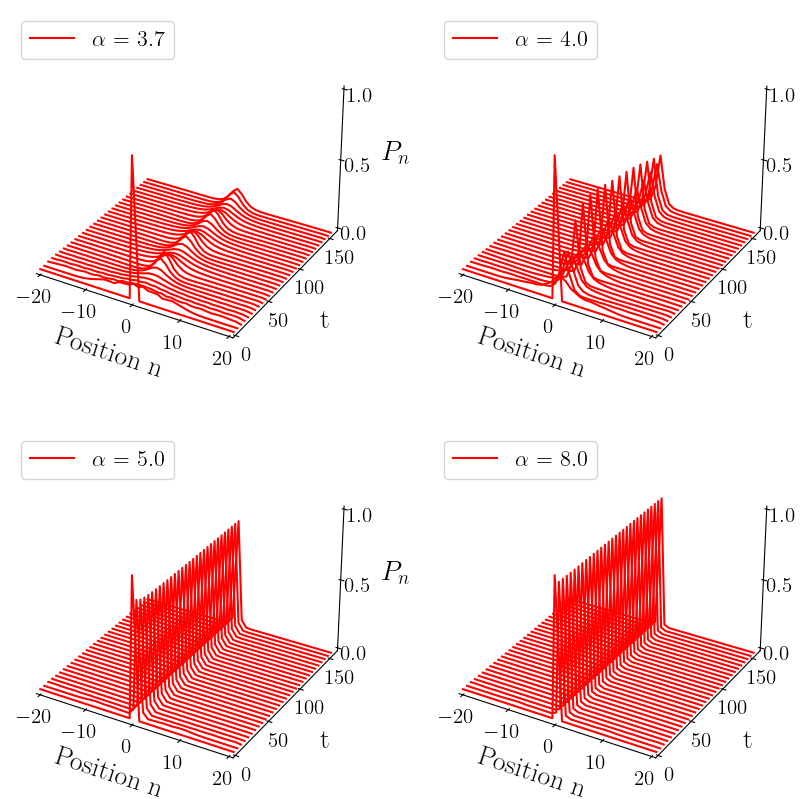

In [28]:
import numpy as np
import matplotlib.pyplot as plt

N = 4000
Time = 160
mat = np.zeros((4, N, 41))
alpha = np.array([3.7,4,5,8])
print(np.shape(mat[0]))
damp = 0.6

mat[0] = np.fromfile("./Damping_alpha(" + str(3.7) + ")/xi(" + str(damp) + ")/lambda(" + str(damp) + ").bin", dtype=np.float64).reshape(N, 41)
mat[1] = np.fromfile("./Damping_alpha(" + str(4) + ")/xi(" + str(damp) + ")/lambda(" + str(damp) + ").bin", dtype=np.float64).reshape(N, 41)
mat[2] = np.fromfile("./Damping_alpha(" + str(5) + ")/xi(" + str(damp) + ")/lambda(" + str(damp) + ").bin", dtype=np.float64).reshape(N, 41)
mat[3] = np.fromfile("./Damping_alpha(" + str(8) + ")/xi(" + str(damp) + ")/lambda(" + str(damp) + ").bin", dtype=np.float64).reshape(N, 41)
control = int(np.shape(mat[0])[0] / 30)
print(control)

# Plotting Features
fig = plt.figure(figsize=(10, 10))

for i in range(4):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    ax.set_xlim(-20, 20)
    ax.set_ylim(0, Time)
    xLabel = ax.set_xlabel(r"Position n", linespacing=3.2, fontsize=20)
    yLabel = ax.set_ylabel(r"t", linespacing=3.1, fontsize=20)
    zLabel = ax.set_zlabel(r"$P_n$", linespacing=3.4, fontsize=20)
    ax.zaxis.set_rotate_label(False)
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.xaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
    ax.yaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
    ax.zaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)

    for j in range(1, int(np.shape(mat[i])[0] / control)):
        x = np.linspace(-np.shape(mat[i])[1] / 2, np.shape(mat[i])[1] / 2, np.shape(mat[i])[1])
        y = np.linspace(0, Time, np.shape(mat[i])[0])
        ax.plot(x, y[j * control] * np.ones(np.shape(mat[i])[1]), mat[i][j * control], color="r")

    ax.plot(x, np.ones(np.shape(mat[i])[1]) * 0, mat[i][0], color="r", label=r'$ \alpha $ = ' + str(alpha[i]))
    ax.set_zticks([0, 0.5, 1])
    ax.tick_params(axis='y', pad=-1) 
    ax.tick_params(axis='x', pad=-1) 
    ax.tick_params(axis='z', pad=-1) 

    ax.legend(fontsize=16, loc= 'upper left')


#plt.savefig("HDNLS(" + str(damp) + ").jpg")
plt.show()


(4000000,)


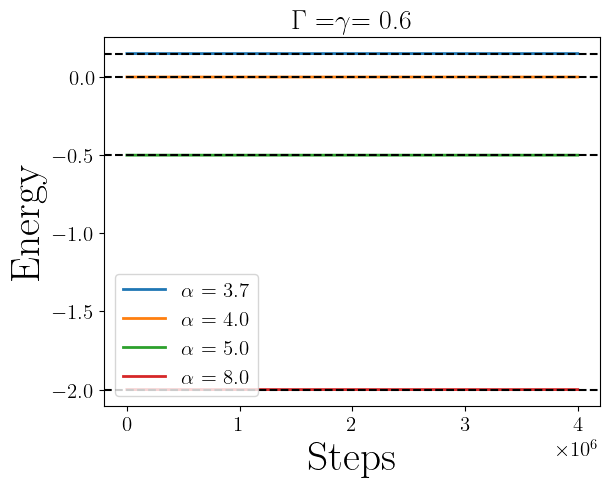

In [29]:
alpha = np.array([3.7,4,5,8])
data = np.zeros((4,4000000))
damp = 0.6
#data = np.zeros((4,4))
data[0] = np.fromfile("./Damping_alpha(" + str(3.7) + ")/xi(" + str(damp) + ")/energy.bin", dtype=np.float64)
data[1] = np.fromfile("./Damping_alpha(" + str(4) + ")/xi(" + str(damp) + ")/energy.bin", dtype=np.float64)
data[2] = np.fromfile("./Damping_alpha(" + str(5) + ")/xi(" + str(damp) + ")/energy.bin", dtype=np.float64)
data[3] = np.fromfile("./Damping_alpha(" + str(8) + ")/xi(" + str(damp) + ")/energy.bin", dtype=np.float64)
print(np.shape(data[0]))
plt.plot(data[0], label=r'$ \alpha $ = ' + str(alpha[0]), linewidth=2)
plt.plot(data[1], label=r'$ \alpha $ = ' + str(alpha[1]), linewidth=2)
plt.plot(data[2], label=r'$ \alpha $ = ' + str(alpha[2]), linewidth=2)
plt.plot(data[3], label=r'$ \alpha $ = ' + str(alpha[3]), linewidth=2)

plt.axhline(y = 0.15, color = 'black', linestyle = '--')
plt.axhline(y = 0., color = 'black', linestyle = '--')
plt.axhline(y = -0.5, color = 'black', linestyle = '--')
plt.axhline(y = -2.0, color = 'black', linestyle = '--')

plt.legend(fontsize=15, loc="lower left")
plt.title("$ \Gamma $ =$ \gamma $= " + str(damp), fontsize = 20)
plt.xlabel("Steps")
plt.ylabel("Energy")
plt.savefig("Energy" + str(damp) + ".jpg")
plt.show()

Text(0, 0.5, '$p_0$')

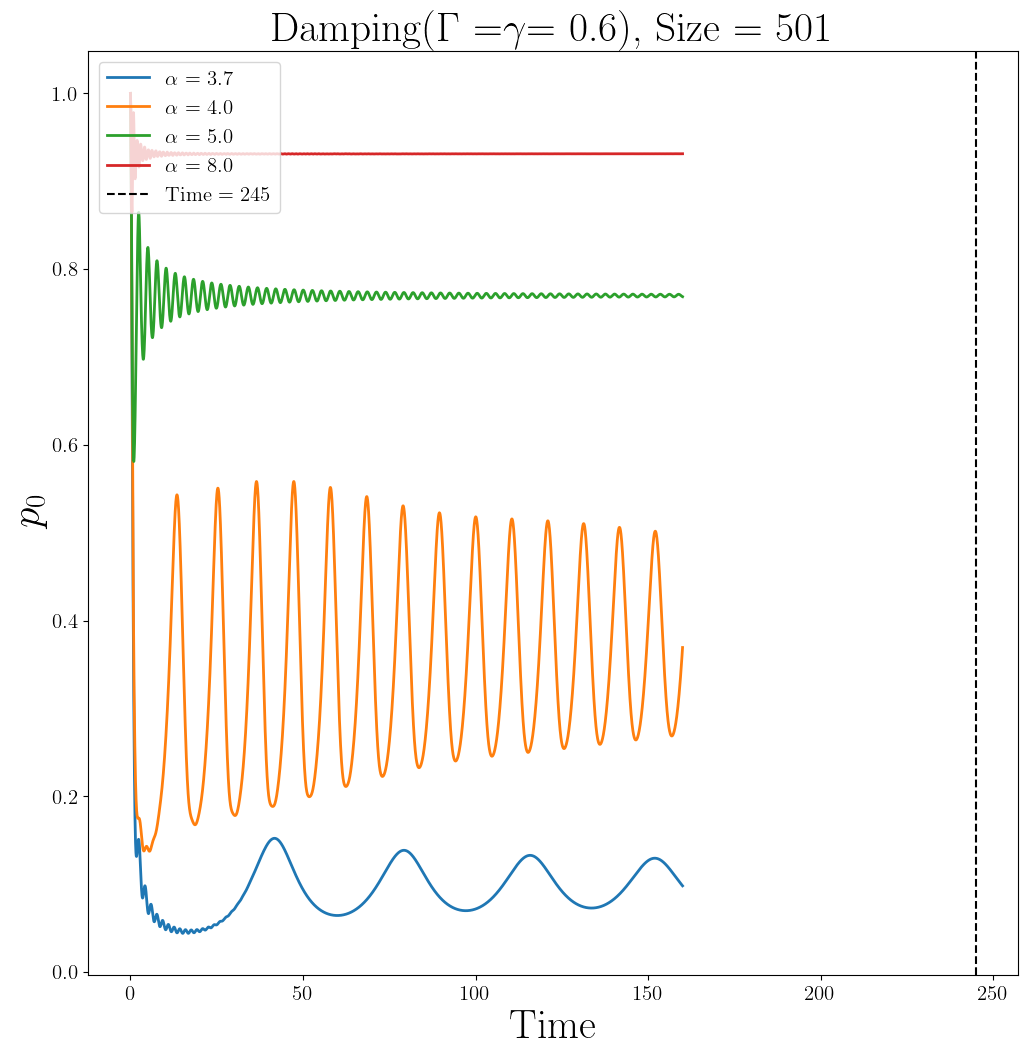

In [30]:
fig = plt.figure(figsize=(12, 12))

pzero = np.zeros((4,N))
for i in range(4):
    for j in range(N):
        pzero[i,j] = mat[i, j, 20]

y = np.linspace(0, Time, np.shape(mat[i])[0])
plt.plot(y, pzero[0], label=r'$ \alpha $ = ' + str(alpha[0]), linewidth=2)
plt.plot(y, pzero[1], label=r'$ \alpha $ = ' + str(alpha[1]), linewidth=2)
plt.plot(y, pzero[2], label=r'$ \alpha $ = ' + str(alpha[2]), linewidth=2)
plt.plot(y, pzero[3], label=r'$ \alpha $ = ' + str(alpha[3]), linewidth=2)
plt.axvline(x = 245, color = 'black', linestyle = '--', label = 'Time = 245')
plt.legend(fontsize=15, loc="upper left")
plt.title("Damping($ \Gamma $ =$ \gamma $= " + str(damp) + "), Size = 501", fontsize = 30)
plt.xlabel("Time")
plt.ylabel("$p_0$")
#plt.savefig("p0-501-" + str(damp) + ".jpg")

In [22]:
N = 6000
Time = 60
mat = np.zeros((4, N, 501))
alpha = np.array([3.7,4,5,8])
print(np.shape(mat[0]))

mat[0] = np.fromfile("./Damping_alpha(2)/xi(0.8)/lambda(0.8).bin", dtype=np.float64).reshape(N, 501)
mat[1] = np.fromfile("./Damping_alpha(3)/xi(0.8)/lambda(0.8).bin", dtype=np.float64).reshape(N, 501)
mat[2] = np.fromfile("./Damping_alpha(4)/xi(0.8)/lambda(0.8).bin", dtype=np.float64).reshape(4000, 501)
#mat[3] = np.fromfile("./DNLS/8.bin", dtype=np.float64).reshape(N, 41)

fig = plt.figure(figsize=(10, 8))

pzero = np.zeros((4,N))
for i in range(2):
    for j in range(N):
        pzero[i,j] = mat[i, j, 250]

y = np.linspace(0, Time, np.shape(mat[i])[0])
plt.plot(y, pzero[0], label=r'$ \alpha $ = ' + str(alpha[0]), linewidth=2)
plt.plot(y, pzero[1], label=r'$ \alpha $ = ' + str(int(alpha[1])), linewidth=2)
plt.plot(y, pzero[2], label=r'$ \alpha $ = ' + str(alpha[2]), linewidth=2)
#plt.plot(y, pzero[3], label=r'$ \alpha $ = ' + str(alpha[3]), linewidth=2)
#plt.axvline(x = 245, color = 'black', linestyle = '--', label = 'Time = 245')
plt.legend(fontsize=15, loc="upper left")
plt.title("DNLS", fontsize = 30)
plt.xlabel("Time")
plt.ylabel("$p_0$")
#plt.savefig("p0-501-" + str(damp) + ".jpg")

(6000, 501)


ValueError: cannot reshape array of size 164000000 into shape (4000,501)

0.12332812875750505
0.125
3.75


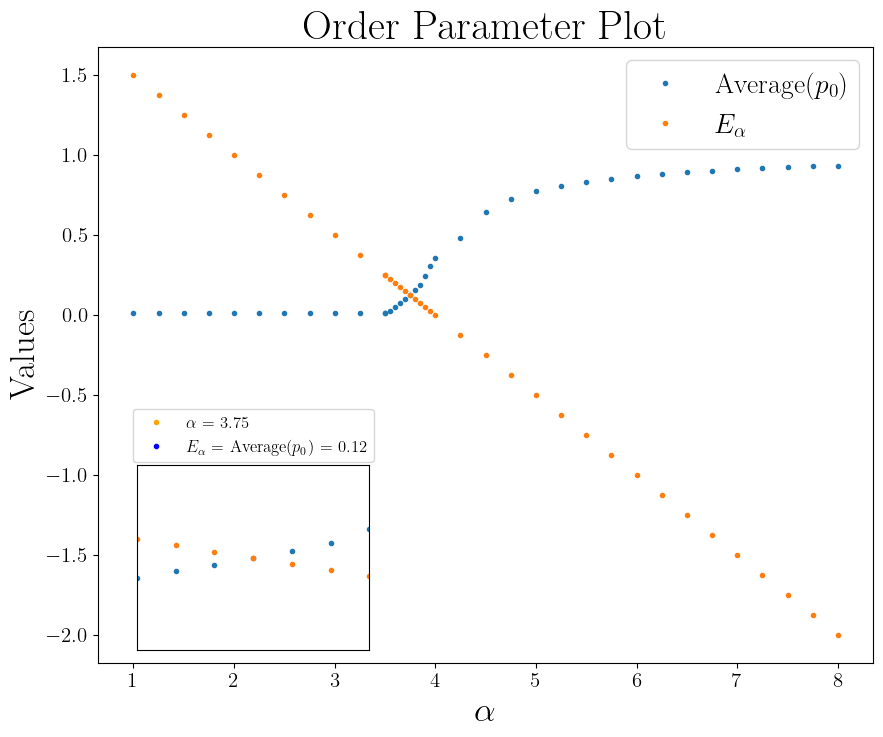

In [81]:
fig, axis = plt.subplots(figsize=(10, 8))

alpha = [1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.50, 3.55, 3.60, 3.65, 3.70, 3.75, 3.80, 3.85, 3.90, 3.95, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75, 7, 7.25, 7.5, 7.75, 8]
ave = np.fromfile("./AllAlpha/ave.bin", dtype=np.float64).reshape(len(alpha))
energy = np.fromfile("./AllAlpha/energy.bin", dtype=np.float64).reshape(len(alpha))
print(ave[16])
print(energy[16])
print(alpha[16])

# Create an inset axis in the bottom right corner
axin = axis.inset_axes([0.05, 0.02, 0.30, 0.30])# Plot the data on the inset axis and zoom in on the important part
axin.plot(alpha, ave, '.')
axin.plot(alpha, energy, '.')
axin.set_xlim(3.6,3.9)
axin.set_ylim(-0.25, 0.5)
axin.plot([], [], '.', color='orange', label=r'$\alpha$ = 3.75')
axin.plot([], [], '.', color='b', label=r'$E_\alpha$ = Average($p_0$) = 0.12')
axin.legend(loc="upper center", bbox_to_anchor=(0.5, 1.35), fontsize = 12)
axin.set_xticks([])
axin.set_yticks([])
# Add the lines to indicate where the inset axis is coming from
#axis.indicate_inset_zoom(axin)

plt.plot(alpha, ave, '.', label= r'Average($p_0$)')#, label = "Average($p_0$)"
plt.plot(alpha, energy, '.', label = r'$E_ \alpha $') #

#plt.legend(fontsize=15, loc="upper left")
plt.title("Order Parameter Plot", fontsize = 30)
plt.xlabel(r'$ \alpha $', fontsize = 25)
plt.ylabel("Values", fontsize = 25)
plt.legend(fontsize = 20)

plt.savefig("Values.jpg")

(4500,)
0.35080496133333333


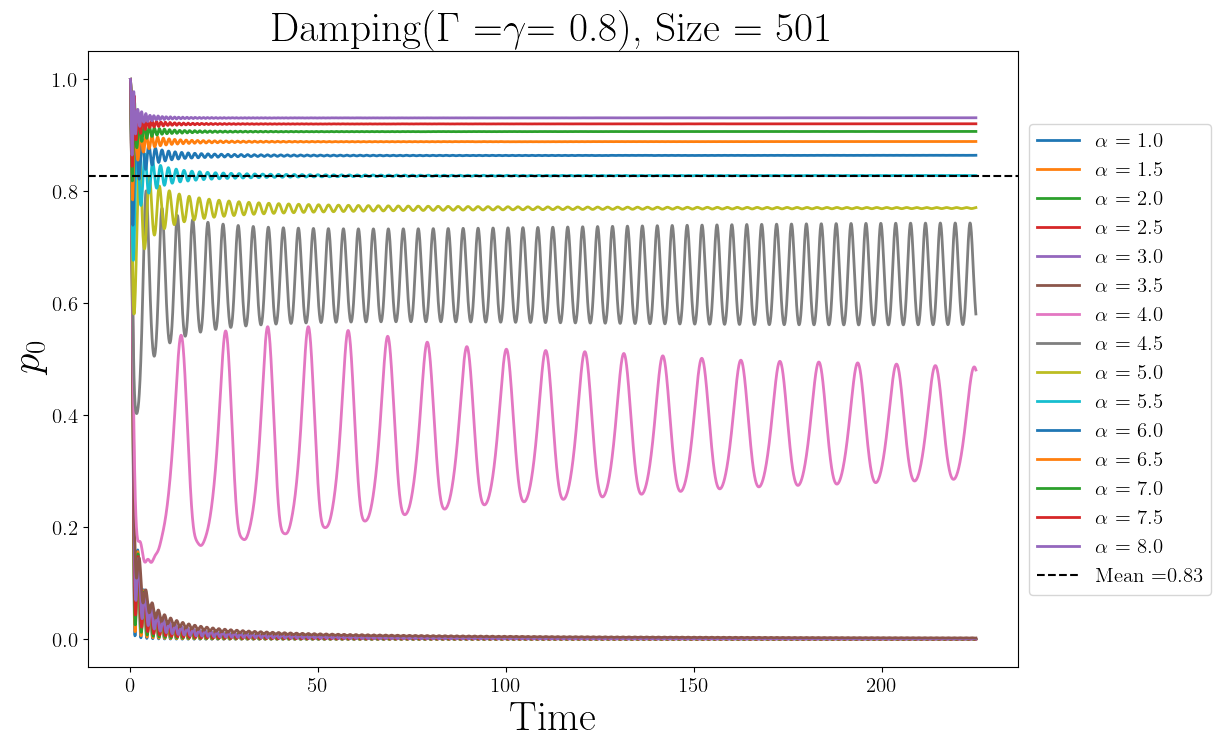

In [39]:
fig = plt.figure(figsize=(12, 8))

N = 4500
Time = 225
mat = np.zeros((15, N))
alpha = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8])
print(np.shape(mat[0]))
y = np.linspace(0, Time, N)

for i in range(len(alpha)):
    mat[i] = np.loadtxt("./AllAlpha/pzero" + str(i) + ".txt")

for i in range(len(alpha)):
    plt.plot(y, mat[i], label=r'$ \alpha $ = ' + str(alpha[i]), linewidth=2)

print(np.mean(mat[6]))
plt.axhline(y = np.mean(mat[9]), color = 'black', linestyle = '--', label = 'Mean =' + str(round(np.mean(mat[9]), 2)))
plt.legend(fontsize=15, loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Damping($ \Gamma $ =$ \gamma $= " + str(0.8) + "), Size = 501", fontsize = 30)
plt.xlabel("Time")
plt.ylabel("$p_0$")
plt.savefig("Allp0.jpg")

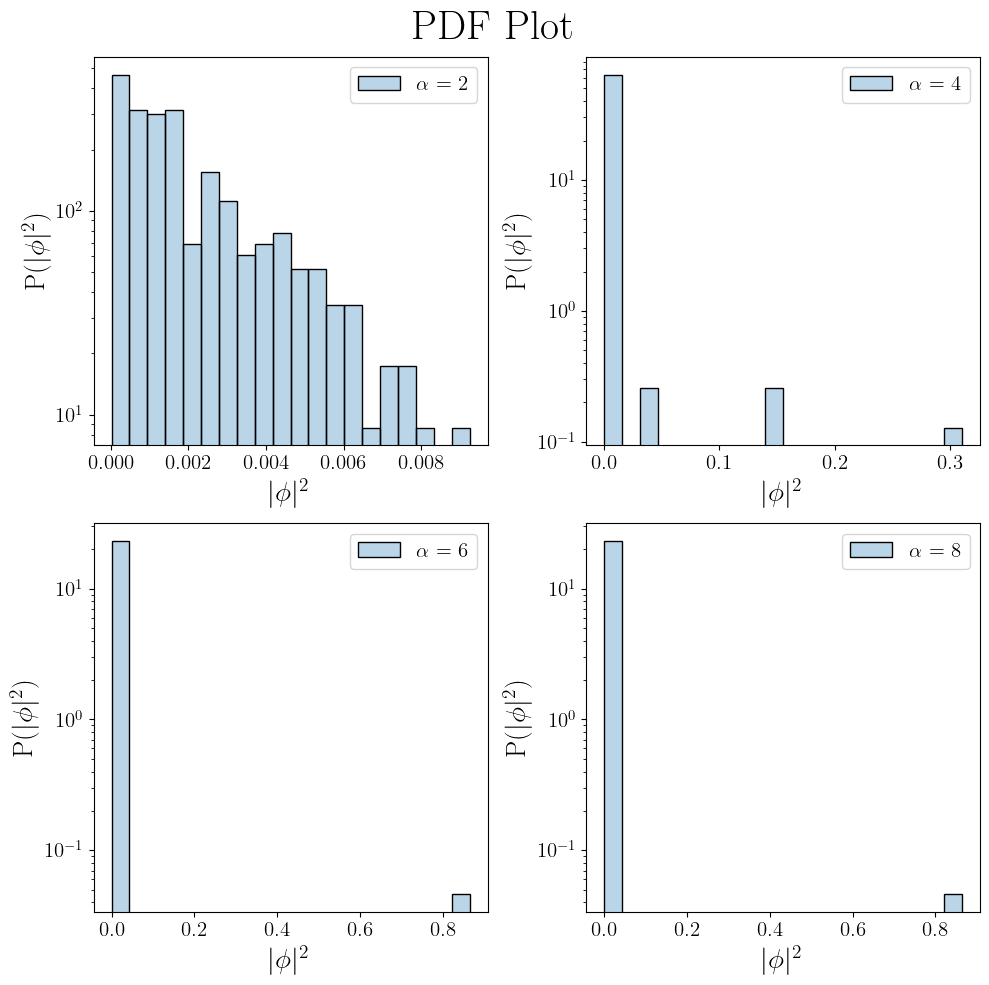

In [180]:
import seaborn as sns
from scipy import stats
alpha = [2, 4, 6, 8]

fig, axs = plt.subplots(2, 2, figsize=(10,10))
mat = np.fromfile("./AllAlpha/dens.bin", dtype=np.float64).reshape(len(alpha), 501) #len(alpha)

sns.histplot(mat[0], stat = 'density', bins=20, alpha = 0.3, label=r'$ \alpha $ = ' + str(alpha[0]), ax = axs[0, 0]) #, kde=True
sns.histplot(mat[1], stat = 'density', bins=20, alpha = 0.3, label=r'$ \alpha $ = ' + str(alpha[1]), ax = axs[0, 1]) #, kde=True
sns.histplot(mat[2], stat = 'density', bins=20, alpha = 0.3, label=r'$ \alpha $ = ' + str(alpha[2]), ax = axs[1, 0]) #, kde=True
sns.histplot(mat[2], stat = 'density', bins=20, alpha = 0.3, label=r'$ \alpha $ = ' + str(alpha[3]), ax = axs[1, 1]) #, kde=True

#plt.xlim(0,0.05)
axs[0, 0].set_xlabel("$|\phi|^2$")
axs[0, 0].set_ylabel("P($|\phi|^2$)")
axs[0, 0].set_yscale('log')
axs[0, 0].legend(fontsize=15)

axs[0, 1].set_xlabel("$|\phi|^2$")
axs[0, 1].set_ylabel("P($|\phi|^2$)")
axs[0, 1].set_yscale('log')
axs[0, 1].legend(fontsize=15)

axs[1, 0].set_xlabel("$|\phi|^2$")
axs[1, 0].set_ylabel("P($|\phi|^2$)")
axs[1, 0].set_yscale('log')
axs[1, 0].legend(fontsize=15)

axs[1, 1].set_xlabel("$|\phi|^2$")
axs[1, 1].set_ylabel("P($|\phi|^2$)")
axs[1, 1].set_yscale('log')
axs[1, 1].legend(fontsize=15)
fig.suptitle('PDF Plot', fontsize=30)
fig.tight_layout()
plt.show()
